<a href="https://colab.research.google.com/github/almemanuel/data-science-from-scratch/blob/main/code/probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependency and Independency

- Two events are dependents when the first event has information about the second and vice-versa
- The probability between two dependents events are the product of their occurrence probability

$P(E,F)= P(E)P(F)$

## Conditional Probability

Between two events, where $P \neq 0$, the event probability conditioned for another is $P(E|F)=\frac{P(E,F)}{P(F)}=P(E,F)=P(E|F)P(F)$

If the events are independents, $P(E|F) = P(E)$

### Example

Context:
- A family with two child. 
Hypothesis:
- $P(BOY)=P(GIRL)$
- The gender of the second child is independent from the first child gender

So:
- The event 'no one girl' has $P = \frac{1}{4}$
- 'a girld and a boy', $P = \frac{1}{2}$
- 'only girls', $P = \frac{1}{4}$

Question:
- Whats the probability of the event 'only girls' (B) conditioned to event 'the older child is a girl' (G)?

Answer:
$P(B|G) = \frac{P(B,G)}{P(G)} = \frac{P(B)}{P(G)} = \frac{1}{2}$

- If the two childs are girls, the older child is a girl too

In [1]:
import enum, random

In [6]:
class Kid(enum.Enum):
    BOY = 0
    GIRL = 1


def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

In [8]:
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1

print(f'P(both|older)={both_girls/older_girl}')
print(f'P(both|either)={both_girls/either_girl}')

P(both|older)=0.5007089325501317
P(both|either)=0.3311897106109325


## Bayes' Theorem

- help to 'revert' conditional probabilities 
- util when exists a conditional event between two events but only one probability know

$P(E|F)=\frac{P(E,F)}{P(E)}=\frac{P(F|E)P(E)}{P(F)}$

$P(F)=P(F,E)+P(F, \neg{E})$

$P(E|F)=\frac{P(F|E)P(E)}{P(F|E)P(E)+P(F|\neg{E})P(\neg{E})}$

## Distribution

In [9]:
def uniform_pdf(x:float) -> float:
    return 1 if 0 <= x < 1 else 0
    

In [10]:
def uniform_cdf(x:float) -> float:
    if x < 0:
        return 0
    return 1

### Normal Distribution

$f(x|\mu, \sigma)= {(\frac{1}{\sqrt{2\pi\sigma}})}^{-\frac{{(x-\mu)}^{2}}{2\sigma^2}}$

In [12]:
import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x:float, mu:float = 0, sigma:float = 1) -> float:
    return (math.exp( - (x - mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

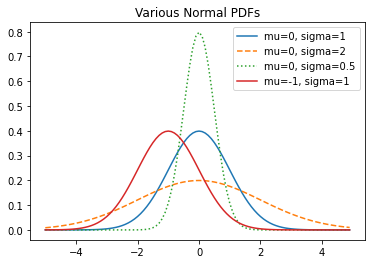

In [13]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]

plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label = 'mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '--', label = 'mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma = .5) for x in xs], ':', label = 'mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu = -1) for x in xs], '-', label = 'mu=-1, sigma=1')

plt.legend()

plt.title('Various Normal PDFs')

plt.show()

In [15]:
def normal_cdf(x:float, mu:float = 0, sigma:float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

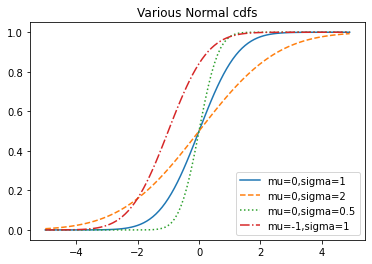

In [16]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')

plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4)

plt.title('Various Normal cdfs')

plt.show()

In [17]:
def inverse_normal_cdf(p:float, mu:float = 0, sigma:float = 1, tolerance:float = 0.00001) -> float:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0
    hi_z = 10.0

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)

        if mid_p < p:
            low_z = mid_z
        else:
            hi_z = mid_z

    return mid_z